## Import packages

In [1]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from CFModel import CFModel
from CFModel import DeepModel

Using TensorFlow backend.


## Define constants

In [2]:
RATINGS_CSV_FILE = './input/rating_result.csv'
MODEL_WEIGHTS_FILE = 'recipe_weights.h5'
K_FACTORS = 120
RNG_SEED = 144653

## Load Recipe data

In [3]:
ratings = pd.read_csv(RATINGS_CSV_FILE, 
                      sep=',', 
                      encoding='utf-8', 
                      usecols=['id','userid', 'recipeid', 'rating'])
max_userid = ratings['userid'].max() + 1
max_recipeid = ratings['recipeid'].max() + 1
print(len(ratings), 'ratings loaded.')

1048575 ratings loaded.


## Create training set

In [4]:
shuffled_ratings = ratings.sample(frac=1., random_state=RNG_SEED)
Users = shuffled_ratings['userid'].values
print('Users:', Users, ', shape =', Users.shape)
Recipe = shuffled_ratings['recipeid'].values
print('Recipes:', Recipe, ', shape =', Recipe.shape)
Ratings = shuffled_ratings['rating'].values
print('Ratings:', Ratings, ', shape =', Ratings.shape)

Users: [ 3579 10010  4542 ..., 11751  6257  8880] , shape = (1048575,)
Recipes: [1952 1112 1449 ..., 2014  661 1691] , shape = (1048575,)
Ratings: [5 5 5 ..., 5 5 5] , shape = (1048575,)


## Define model

In [5]:
model = DeepModel(max_userid, max_recipeid, K_FACTORS)
model.compile(loss='mse', optimizer='adamax')

## Train model

In [6]:
callbacks = [EarlyStopping('val_loss', patience=2),
             ModelCheckpoint(MODEL_WEIGHTS_FILE, save_best_only=True)]
history = model.fit([Users, Recipe], Ratings, nb_epoch=30, validation_split=.1, verbose=1, callbacks=callbacks)

Train on 943717 samples, validate on 104858 samples
Epoch 1/30
943717/943717 [==============================] - 1816s - loss: 0.0695 - val_loss: 2.1259e-04
Epoch 2/30
943717/943717 [==============================] - 1841s - loss: 6.4041e-04 - val_loss: 3.3472e-07
Epoch 3/30
943717/943717 [==============================] - 1620s - loss: 3.7361e-07 - val_loss: 1.7728e-06
Epoch 4/30
943717/943717 [==============================] - 1611s - loss: 6.8940e-07 - val_loss: 4.4346e-09
Epoch 5/30
943717/943717 [==============================] - 1616s - loss: 7.5940e-07 - val_loss: 6.6245e-12
Epoch 6/30
943717/943717 [==============================] - 1597s - loss: 5.9566e-07 - val_loss: 3.5719e-07
Epoch 7/30
943717/943717 [==============================] - 1661s - loss: 3.0598e-08 - val_loss: 2.9601e-09
Epoch 8/30
943717/943717 [==============================] - 1660s - loss: 2.2511e-10 - val_loss: 1.6764e-10


## Plot training and validation RMSE

/home/soonmok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


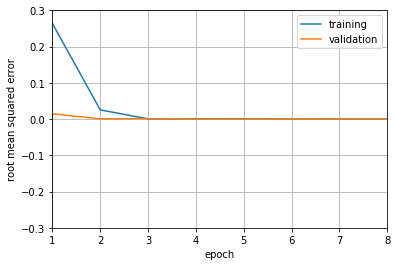

In [10]:
loss = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                     'training': [ math.sqrt(loss) for loss in history.history['loss'] ],
                     'validation': [ math.sqrt(loss) for loss in history.history['val_loss'] ]})
#ax = loss.ix[:,:].plot(x='epoch', figsize={1,30}, grid=True)
ax = loss.ix[:,:].plot(x='epoch', grid=True)
ax.set_ylabel("root mean squared error")
ax.set_ylim([-0.3,0.3]);